#### Os dados foram extraídos da platafome UCI e adaptado para o trabalho de conclusão da disciplina PCS5024 - Aprendizado Estatístico - Faculdade de Engenharia da Computação - Mestrado - Escola Politécnica - USP.

#### O objetivo é predizer a renda anual em USD de cada individuo levando em conta o nivel de escolaridade, tipo de emprego...

# Importando bibliotecas

In [1]:
!pip install dfply 
!pip install scikit-plot
!pip install graphviz
!pip install dtreeviz
!pip install seaborn
!pip install plotly --upgrade
!pip install nbformat --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

import matplotlib # para geração de gráficos
import matplotlib.pyplot as plt # configurações adicionais para os gráficos a serem gerados
from matplotlib import rcParams
import seaborn as sns
import plotly.express as px

# informamos ao Python que estamos usando um notebook e que os gráficos devem ser exibidos nele
%matplotlib inline

#import seaborn as sns #alternativa para a matplotlib para geração de gráficos

# SCIKIT-LEARN
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from sklearn.metrics import brier_score_loss, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from dfply import *  # para importar os comandos da biblioteca dfply

import scikitplot as skplt

from dtreeviz.trees import *

import warnings # ignorando os warnings emitidos pelo Python
warnings.filterwarnings("ignore")

# Pré Processamento dos Dados

In [3]:
drive = ("https://drive.google.com/uc?export=download&id=18_EtaItoDFwrQiDupfEEeGryJpYnvFN8")
df = pd.read_csv(drive)

In [4]:
df.head()

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# Renomeando as colunas

In [5]:
df.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

In [6]:
#renomeando as colunas
df.columns = ["Age",
    "workclass",
    "final_weight",
    "education",
    "education_num",
    "marital_status",
    "occupation",
    "relationship",
    "Race",
    "Sex",
    "Capital_gain",
    "capital_loos",
    "Hour_per_week",
    "Native_country",
    "Income"]

# Preparação do conjunto de dados

In [7]:
df.head()

,Age,workclass,final_weight,education,education_num,marital_status,occupation,relationship,Race,Sex,Capital_gain,capital_loos,Hour_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,32560.0,38.581634,13.640642,17.0,28.0,37.0,48.0,90.0
final_weight,32560.0,189781.814373,105549.764924,12285.0,117831.5,178363.0,237054.5,1484705.0
education_num,32560.0,10.080590,2.572709,1.0,9.0,10.0,12.0,16.0
Capital_gain,32560.0,1077.615172,7385.402999,0.0,0.0,0.0,0.0,99999.0
capital_loos,32560.0,87.306511,402.966116,0.0,0.0,0.0,0.0,4356.0
Hour_per_week,32560.0,40.437469,12.347618,1.0,40.0,40.0,45.0,99.0


In [9]:
# Verificação de valores faltantes
df.isnull().sum()

Age               0
workclass         0
final_weight      0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
Race              0
Sex               0
Capital_gain      0
capital_loos      0
Hour_per_week     0
Native_country    0
Income            0
dtype: int64

# Visualização dos dados

In [10]:
np.unique(df["Income"], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24719,  7841]))

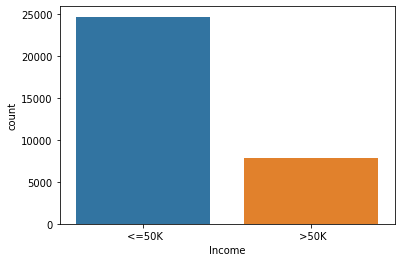

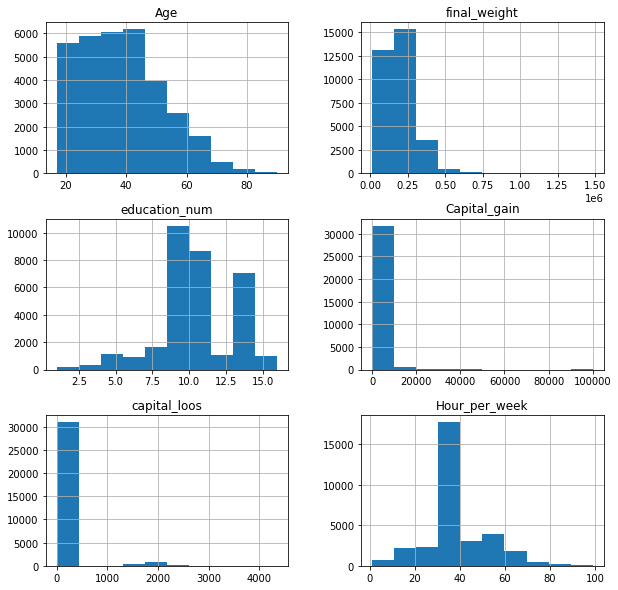

In [11]:
# Graficamente é notorio que a quantidade de pessoas que ganham 50k ou menos é maior.
sns.countplot(x = df.Income);
plotar = df.hist(figsize = (10,10))

In [12]:
# A maioria das pessoas trabalham no setor privado como mostra o gráfico
plots = px.treemap(df, path=["workclass"])
plots.show()

In [13]:
# Os funcionarios com o grau de doutor a maioria ganham acima de 50K
plots = px.treemap(df, path=["education", "Income"])
plots.show()

# Divisão de previsores e classes

In [14]:
# Previsores
X = df.iloc[:, 0:14].values

In [15]:
X

array([[50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       [53, ' Private', 234721, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [16]:
# Classe
y = df.iloc[:, 14].values

In [17]:
y

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

### Transformar dados categoricos em numéricos contínuos 

# LabelEncoder

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
transformar = LabelEncoder()

In [20]:
workclass = transformar
education = transformar
marital_status = transformar
occupation = transformar
relationship = transformar
Race = transformar
Sex = transformar
Native_country = transformar

In [21]:
X[:, 1] = workclass.fit_transform(X[:, 1]) 
X[:, 3] = education.fit_transform(X[:, 3])
X[:, 5] = marital_status.fit_transform(X[:, 5])  
X[:, 6] = occupation.fit_transform(X[:, 6]) 
X[:, 7] = relationship.fit_transform(X[:, 7]) 
X[:, 8] = Race.fit_transform(X[:, 8]) 
X[:, 9] = Sex.fit_transform(X[:, 9]) 
X[:, 13] = Native_country.fit_transform(X[:, 13]) 

In [22]:
X

array([[50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       [53, 4, 234721, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

In [23]:
len(np.unique(df["workclass"]))

9

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [25]:
one = ColumnTransformer(transformers=[("oneHot", OneHotEncoder(), [1, 3, 5, 6, 7, 8, 9, 13])], remainder="passthrough")

In [26]:
X = one.fit_transform(X).toarray()

### Divisão dos dados em treino e teste

In [27]:
# Importando a biblioteca
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [29]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24420, 108), (8140, 108), (24420,), (8140,))

### Padronização

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
escala = StandardScaler()

In [32]:
escala.fit(X_train)

StandardScaler()

In [33]:
X_train = escala.transform(X_train)

In [34]:
X_test = escala.transform(X_test)

In [35]:
# Criando uma função para obtenção dos principais indicadores de performance do modelo
def rodarModelo(modelo, X_train, y_train, X_test, y_test, confusion_matrix=True, normalizeCM=False, roc=True, plot_calibration=True, random_state=42, title=""): #pos_label=1):
    
    clf = modelo
    name = title
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
        
    if hasattr(clf, "predict_proba"):
        prob_pos = clf.predict_proba(X_test)
    else:  # usar decision function
        prob_pos = clf.decision_function(X_test)
        prob_pos = (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())
    if confusion_matrix:
       skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=normalizeCM, title=name)
    if roc:
       skplt.metrics.plot_roc(y_test, prob_pos, plot_micro=False, plot_macro=False, classes_to_plot=[1], title=name,figsize=(10,10))
     
            
    prob_pos = prob_pos[:,1]
    #clf_score = brier_score_loss(y_test, prob_pos, pos_label=pos_label)
    print("%s:" % name)
    #print("\tBrier: %1.3f" % (clf_score))
    print("\tROC(AUC) %1.3f" % roc_auc_score(y_test, prob_pos))
    print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
    print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
    print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))
        
    if plot_calibration:
      
      fraction_of_positives, mean_predicted_value = \
                calibration_curve(y_test, prob_pos, n_bins=10)
      plt.rcParams.update({'font.size': 22})
      plt.rc('legend',**{'fontsize':22})
      fig = plt.figure(3, figsize=(10, 10))
      ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
      ax2 = plt.subplot2grid((3, 1), (2, 0))
      ax1.plot([0, 1], [0, 1], "k:", label="Perfeitamente calibrado",)
      ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
                     label="%s (%1.3f)" % (name, clf_score))

      ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
                     histtype="step", lw=2)

      ax1.set_ylabel("Fração de positivos")
      ax1.set_ylim([-0.05, 1.05])
      ax1.legend(loc="lower right")
      ax1.set_title('Gráfico de Calibração  (reliability curve)')
      
      ax2.set_xlabel("Valor médio predito")
      ax2.set_ylabel("Quantidade")
      ax2.legend(loc="upper center", ncol=2)
      
      for item in ([ax1.title, ax1.xaxis.label, ax1.yaxis.label] +
             ax1.get_xticklabels() + ax1.get_yticklabels()):
        item.set_fontsize(22)
        
      for item in ([ax2.title, ax2.xaxis.label, ax2.yaxis.label] +
             ax2.get_xticklabels() + ax2.get_yticklabels()):
        item.set_fontsize(22)
      
      plt.tight_layout()
      plt.show()

In [36]:
# Função de melhores pontuações
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

# Machine Learning

In [37]:
# modelo random forest
rf = RandomForestClassifier(random_state=42, verbose=1)

# Otimização de hiperparâmetros

In [38]:
# Número de árvores no Random Forest
n_estimators = [10, 40, 100, 300]
# Número de features a serem consideradas a cada split
max_features = ["sqrt", "log2"]
# Número máximo de níveis na árvore
max_depth = [5, 10, 20]
# Número mínimo de amostras necessárias para dividir um nó
min_samples_split = [2, 5, 10]
# Número mínimo de amostras necessárias em cada leaf node
min_samples_leaf = [1, 5, 10]
# Método de seleção das amostras para treinamento de cada árvore
bootstrap = [True, False]
criterion = ["gini", "entropy", "log_loss"]


# Criação do parametro
parametros = {"criterion":criterion,
              "n_estimators":n_estimators, 
              "min_samples_split": min_samples_split,
              "min_samples_leaf": min_samples_leaf,
              "max_features": max_features 

}


cv = RandomizedSearchCV(rf, n_iter=60, cv=3, verbose=1, param_distributions=parametros, n_jobs = -1)


In [39]:
# otimizando os hiperparâmetros
cv.fit(X_train, y_train)

Fitting 3 folds for each of 60 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.5s finished


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(random_state=42, verbose=1),
                   n_iter=60, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 5, 10],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 40, 100, 300]},
                   verbose=1)

In [40]:
# melhores estimadores
# rf = cv.best_estimator_
best_parametros = cv.best_params_
best_estimator = cv.best_estimator_
print("Melhor parametro:", best_parametros)
print("Melhor resultado:", best_estimator)

Melhor parametro: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'criterion': 'entropy'}
Melhor resultado: RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       min_samples_leaf=5, random_state=42, verbose=1)


### Hiperparametros Otimizados

In [41]:
# modelo random forest otimizado
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=1,
                       warm_start=False)

In [42]:
# Performance do modelo
rodarModelo(rf, X_train, y_train, X_test, y_test, title="Random Forest")